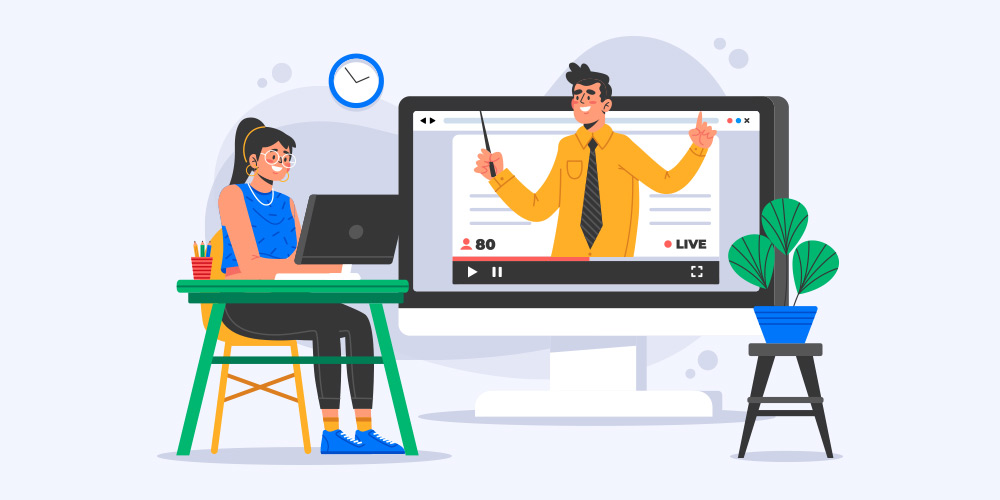

In [39]:
%matplotlib inline
from IPython.display import Image

Image(filename='Ai_project.jpg')


#  *The dataset aims to identify what are differnt factor affecting during online eduction system*


* Survey results on "ONLINE EDUCATION SYSTEM REVIEW" 




### Importing Necessary Libraries

In [40]:
import pandas as pd
import numpy as np

# Visualization imports
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import tree
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree  import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import random
import warnings
warnings.filterwarnings("ignore")

### Read Dataset

In [41]:
# read the dataset

df=pd.read_csv('edu_dataset.csv')

In [42]:
# checking 1st rows of Dataset

df.head()

,Gender,Home Location,Level of Education,Age(Years),Number of Subjects,Device type used to attend classes,Economic status,Family size,Internet facility in your locality,Are you involved in any sports?,...,Time spent on social media (Hours),Interested in Gaming?,Have separate room for studying?,Engaged in group studies?,Average marks scored before pandemic in traditional classroom,Your interaction in online mode,Clearing doubts with faculties in online mode,Interested in?,Performance in online,Your level of satisfaction in Online Education
0,Male,Urban,Under Graduate,18,11,Laptop,Middle Class,4,5,No,...,1,No,No,No,91-100,1,1,Practical,6,Average
1,Male,Urban,Under Graduate,19,7,Laptop,Middle Class,4,1,Yes,...,1,Yes,Yes,No,91-100,1,1,Theory,3,Bad
2,Male,Rural,Under Graduate,18,5,Laptop,Middle Class,5,2,No,...,1,No,Yes,No,71-80,1,1,Both,6,Bad
3,Male,Urban,Under Graduate,18,5,Laptop,Middle Class,4,4,Yes,...,2,No,No,yes,91-100,1,2,Theory,4,Bad
4,Male,Rural,Under Graduate,18,5,Laptop,Middle Class,4,3,No,...,2,Yes,Yes,yes,81-90,3,3,Both,6,Average


### Lets check what the columns mentioned in the dataset says

* 1.Gender – Male, Female.
* 2.Home Location – Rural, Urban
* 3.Level of Education – Post Graduate, School, Under Graduate
* 4.Age – Years
* 5.Number of Subjects – 1- 20
* 6.Device type used to attend classes – Desktop, Laptop, Mobile
* 7.Economic status – Middle Class, Poor, Rich
* 8.Family size – 1 -10
* 9.Internet facility in your locality – Number scale (Very Bad to Very Good)
* 10.Are you involved in any sports? – Yes, No
* 11.Do elderly people monitor you? – Yes, No
* 12.Study time – Hours
* 13.Sleep time – Hours
* 14.Time spent on social media – Hours
* 15.Interested in Gaming? – Yes, No
* 16.Have separate room for studying? – Yes, No
* 17.Engaged in group studies? – Yes, No
* 18.Average marks scored before pandemic in traditional classroom – range
* 19.Your interaction in online mode - Number scale (Very Bad to Very Good)
* 20.Clearing doubts with faculties in online mode - Number scale (Very Bad to Very Good)
* 21.Interested in? – Practical, Theory, Both
* 22.Performance in online - Number scale (Very Bad to Very Good)
* 23.Your level of satisfaction in Online Education – Average, Bad, Good

### Checking Insights of Dataset

In [43]:
# checking the shape of Dataset
rows, cols = df.shape
print("Our dataset have",rows,"rows and",cols,"columns")

Our dataset have 1033 rows and 23 columns


In [44]:
# checking the size of Dataset
df.size

23759

* It has total '23759' values..

In [45]:
# checking the duplicate values in Dataset
df.duplicated().sum()

0

* There are no duplicate value in the dataset 

In [46]:
# checking the detail info of Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1033 entries, 0 to 1032
Data columns (total 23 columns):
 #   Column                                                         Non-Null Count  Dtype 
---  ------                                                         --------------  ----- 
 0   Gender                                                         1033 non-null   object
 1   Home Location                                                  1033 non-null   object
 2   Level of Education                                             1033 non-null   object
 3   Age(Years)                                                     1033 non-null   int64 
 4   Number of Subjects                                             1033 non-null   int64 
 5   Device type used to attend classes                             1033 non-null   object
 6   Economic status                                                1033 non-null   object
 7   Family size                                                    1033 n

* There are total 23 columns in my Dataset.
* In that 10 are numerical columns and 13 are categorical columns.
* there are no missing columns in dataset.



In [47]:
# checking detail describetion of Dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age(Years),1033.0,19.798645,3.199158,9.0,18.0,19.0,20.0,40.0
Number of Subjects,1033.0,7.034850,2.810340,1.0,6.0,7.0,8.0,20.0
Family size,1033.0,4.413359,1.236750,2.0,4.0,4.0,5.0,10.0
Internet facility in your locality,1033.0,3.586641,1.026063,1.0,3.0,4.0,4.0,5.0
Study time (Hours),1033.0,4.325266,2.134233,1.0,3.0,4.0,6.0,10.0
Sleep time (Hours),1033.0,6.947725,1.324039,1.0,6.0,7.0,8.0,10.0
Time spent on social media (Hours),1033.0,2.636980,1.859625,1.0,1.0,2.0,3.0,10.0
Your interaction in online mode,1033.0,2.930300,1.105387,1.0,2.0,3.0,4.0,5.0
Clearing doubts with faculties in online mode,1033.0,2.833495,1.163629,1.0,2.0,3.0,4.0,5.0
Performance in online,1033.0,6.696031,1.920048,2.0,6.0,7.0,8.0,10.0


* The decribe function gives the values of mean,median,mode,sd for numerical columns
* we can see the range of students who used the online education are between 9 to 40..
* the study time are between 1 to 10..
* the sleep time are between 1 to 10.

In [48]:
df.describe(include='object').T

,count,unique,top,freq
Gender,1033,2,Male,614
Home Location,1033,2,Urban,679
Level of Education,1033,3,Under Graduate,817
Device type used to attend classes,1033,3,Laptop,672
Economic status,1033,3,Middle Class,954
Are you involved in any sports?,1033,2,No,663
Do elderly people monitor you?,1033,2,Yes,545
Interested in Gaming?,1033,2,Yes,560
Have separate room for studying?,1033,2,Yes,608
Engaged in group studies?,1033,2,No,616


In [49]:
# checking the nunique values.
df.nunique()

Gender                                                            2
Home Location                                                     2
Level of Education                                                3
Age(Years)                                                       24
Number of Subjects                                               20
Device type used to attend classes                                3
Economic status                                                   3
Family size                                                       9
Internet facility in your locality                                5
Are you involved in any sports?                                   2
Do elderly people monitor you?                                    2
Study time (Hours)                                               10
Sleep time (Hours)                                               10
Time spent on social media (Hours)                               10
Interested in Gaming?                           

In [50]:
# checking the null values.
df.isnull().sum()

Gender                                                           0
Home Location                                                    0
Level of Education                                               0
Age(Years)                                                       0
Number of Subjects                                               0
Device type used to attend classes                               0
Economic status                                                  0
Family size                                                      0
Internet facility in your locality                               0
Are you involved in any sports?                                  0
Do elderly people monitor you?                                   0
Study time (Hours)                                               0
Sleep time (Hours)                                               0
Time spent on social media (Hours)                               0
Interested in Gaming?                                         

* No missing value in dataset..

In [51]:
# checking the correlation
df.corr() # we check correlation with numeric data

,Age(Years),Number of Subjects,Family size,Internet facility in your locality,Study time (Hours),Sleep time (Hours),Time spent on social media (Hours),Your interaction in online mode,Clearing doubts with faculties in online mode,Performance in online
Age(Years),1.000000,-0.011505,0.016893,0.072625,0.005344,-0.072031,0.005455,0.171943,0.125559,0.114965
Number of Subjects,-0.011505,1.000000,0.035997,-0.025915,0.024280,0.051531,0.004833,-0.005144,-0.008595,0.012740
Family size,0.016893,0.035997,1.000000,-0.020996,0.060614,-0.015787,0.053512,-0.024268,-0.019461,0.001549
Internet facility in your locality,0.072625,-0.025915,-0.020996,1.000000,-0.011554,0.051838,0.082772,0.204391,0.158990,0.257339
Study time (Hours),0.005344,0.024280,0.060614,-0.011554,1.000000,-0.044385,-0.125986,0.148859,0.175169,0.134344
Sleep time (Hours),-0.072031,0.051531,-0.015787,0.051838,-0.044385,1.000000,0.144587,0.032598,0.043402,0.065020
Time spent on social media (Hours),0.005455,0.004833,0.053512,0.082772,-0.125986,0.144587,1.000000,-0.083972,-0.101847,-0.086568
Your interaction in online mode,0.171943,-0.005144,-0.024268,0.204391,0.148859,0.032598,-0.083972,1.000000,0.723216,0.557507
Clearing doubts with faculties in online mode,0.125559,-0.008595,-0.019461,0.158990,0.175169,0.043402,-0.101847,0.723216,1.000000,0.561091
Performance in online,0.114965,0.012740,0.001549,0.257339,0.134344,0.065020,-0.086568,0.557507,0.561091,1.000000


### Removing Unimportant Columns

In [52]:
df.drop(["Have separate room for studying?"], axis=1,inplace=True)
df.columns

Index(['Gender', 'Home Location', 'Level of Education', 'Age(Years)',
       'Number of Subjects', 'Device type used to attend classes',
       'Economic status', 'Family size', 'Internet facility in your locality',
       'Are you involved in any sports?', 'Do elderly people monitor you?',
       'Study time (Hours)', 'Sleep time (Hours)',
       'Time spent on social media (Hours)', 'Interested in Gaming?',
       'Engaged in group studies?',
       'Average marks scored before pandemic in traditional classroom',
       'Your interaction in online mode',
       'Clearing doubts with faculties in online mode', 'Interested in?',
       'Performance in online',
       'Your level of satisfaction in Online Education'],
      dtype='object')

## Exploratory Analysis & Visualizations - EDA

#### 1. How Gender impacts Online Education?

In [53]:
# Checking value counts for 'Gender' column.
df['Gender'].value_counts().frame()

Male      614
Female    419
Name: Gender, dtype: int64

Text(0.5, 1.0, 'Gender')

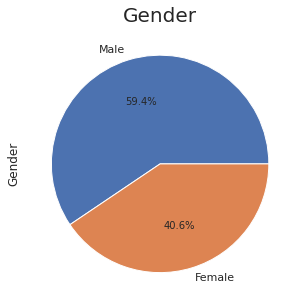

In [54]:
# plotting the pie chart.
plt.figure(figsize=(5,5)) 
df['Gender'].value_counts().plot(kind = "pie" ,autopct='%1.1f%%')    # autopct display the percent value using string formatting
plt.title('Gender',size=20)

#### Insight:
* Male students show higher adaptivity (59.4%) to online education over Females(40.6)..

#### 2. How Age Group impacts Online Education?

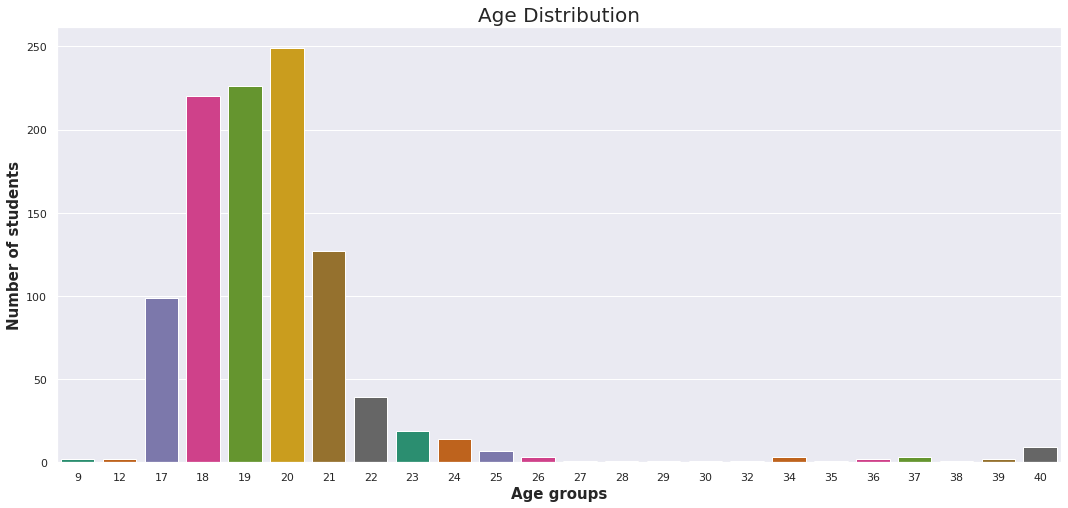

In [55]:
# plotting the count plot
plt.figure(figsize=(18, 8))
sns.set(style='darkgrid')    
plot = sns.countplot(x='Age(Years)', data=df, palette= 'Dark2')  # palette are to control colors or patterns of a columns
plt.title('Age Distribution', size= 20)
plt.xlabel('Age groups', weight='bold', size = 15)
plt.ylabel('Number of students', weight='bold', size = 15)
plt.show()

#### Insight : 
* students are age between 17 - 21 are gives more priority to online education.
* priority to online education scales down from age of 22 onwards
* we can see the pepole between age (27-30) shows no interset for online education.

#### 3. How Education Level impacts Online Education?

In [56]:
# Checking value counts for 'Level of Education' column.
df['Level of Education'].value_counts()

Under Graduate    817
Post Graduate     129
School             87
Name: Level of Education, dtype: int64

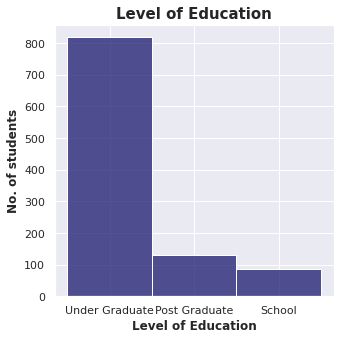

In [57]:
# plotting the Histplot
plt.figure(figsize=(5,5))
sns.histplot(df, x = df['Level of Education'], color = 'midnightblue')
plt.title('Level of Education',weight='bold', size = 15)
plt.xlabel('Level of Education',weight='bold')
plt.ylabel('No. of students',weight='bold')
plt.show()


#### Insight:
* under graduate students showed larger population in comparison with post graduate and school students... And also we see in the graph, in schooling they don't give much important to online eduction..

####  4. How location impacts Online Education?

In [58]:
# Checking value counts for 'Home Location' column.
df['Home Location'].value_counts()

Urban    679
Rural    354
Name: Home Location, dtype: int64

Text(0.5, 1.0, 'Home Location')

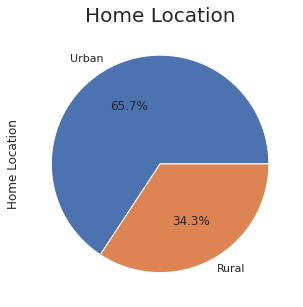

In [59]:
# plotting the pia chart.
plt.figure(figsize=(5,5)) 
df['Home Location'].value_counts().plot(kind = "pie" ,autopct='%1.1f%%')    # autopct display the percent value using string formatting
plt.title('Home Location',size=20)

#### Insight: 
* Students in urban have a better adaptivity upto (65.7%) to online education in comparison to students in rural..(34.3%)

####  5. How device type impacts Online Education?

In [60]:
# Checking value counts for 'Device type used to attend classes' column.
df['Device type used to attend classes'].value_counts()

Laptop     672
Mobile     334
Desktop     27
Name: Device type used to attend classes, dtype: int64

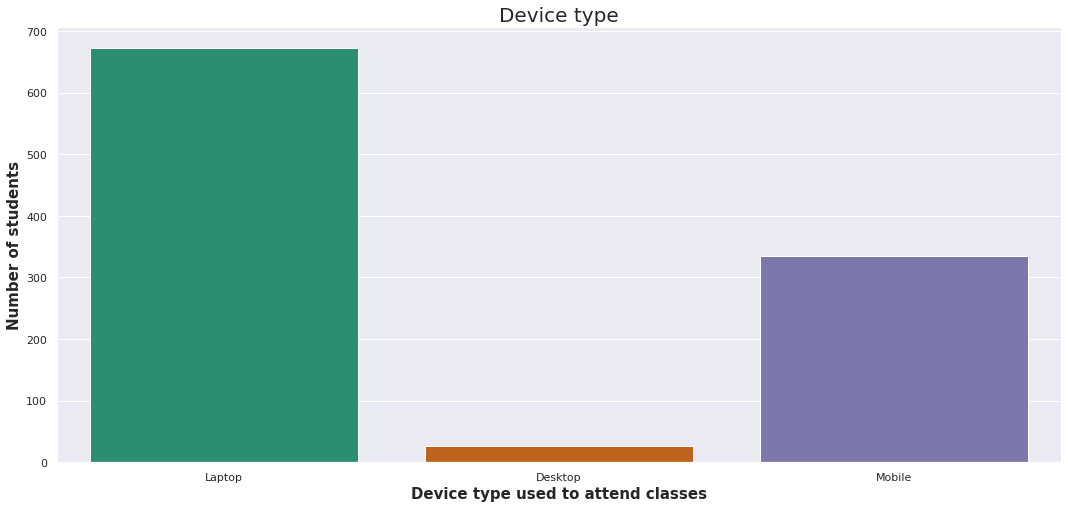

In [61]:
# plotting the count plot
plt.figure(figsize=(18, 8))
sns.set(style='darkgrid')    
plot = sns.countplot(x='Device type used to attend classes', data=df, palette= 'Dark2')  # palette are to control colors or patterns of a columns
plt.title('Device type', size= 20)
plt.xlabel('Device type used to attend classes', weight='bold', size= 15)
plt.ylabel('Number of students', weight='bold', size= 15)
plt.show()

### Insight:
* Laptop and Mobile is more preferred over Desktop.

####  6. Average marks scored before pandemic in traditional classroom

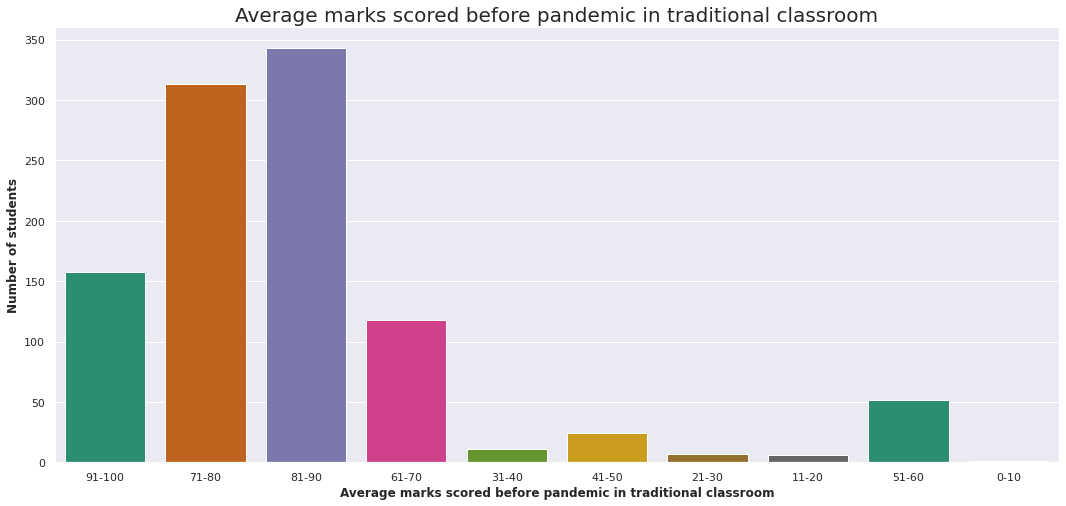

In [62]:
# plotting the count plot
plt.figure(figsize=(18, 8))
sns.set(style='darkgrid')    
plot = sns.countplot(x='Average marks scored before pandemic in traditional classroom', data=df, palette= 'Dark2')  # palette are to control colors or patterns of a columns
plt.title('Average marks scored before pandemic in traditional classroom', size= 20)
plt.xlabel('Average marks scored before pandemic in traditional classroom', weight='bold')
plt.ylabel('Number of students', weight='bold')
plt.show()

#### Insight: 
* we see in graph most off students score (81-90) markes before pandemic

####  7. How Online Education impact on sports?

In [63]:
# Checking value counts for 'Are you involved in any sports?' column.

df['Are you involved in any sports?'].value_counts()

No     663
Yes    370
Name: Are you involved in any sports?, dtype: int64

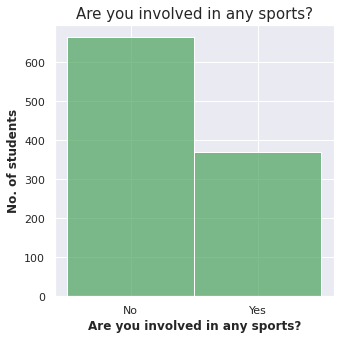

In [64]:
# plotting the histplot 
plt.figure(figsize=(5,5))
sns.histplot(df, x = df['Are you involved in any sports?'],color='g')
plt.title('Are you involved in any sports?', size = 15)
plt.xlabel('Are you involved in any sports?',weight='bold')
plt.ylabel('No. of students',weight='bold')
plt.show()

#### Insight:
* we see in graph the majority of students not involved in any sports because of online eduction,which impact on health..

####  8.  The level of satisfaction in Online Education.

In [65]:
# Checking value counts for 'Are you involved in any sports?' column.
df['Your level of satisfaction in Online Education'].value_counts()

Average    541
Good       251
Bad        241
Name: Your level of satisfaction in Online Education, dtype: int64

Text(0.5, 1.0, 'Level of satisfactions in Online Education')

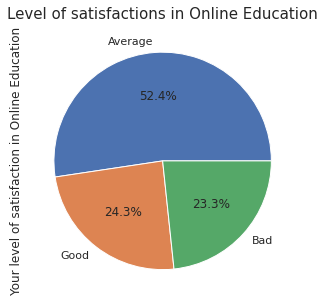

In [66]:
# plotting the pia chart.

plt.figure(figsize=(5,5)) 
df['Your level of satisfaction in Online Education'].value_counts().plot(kind = "pie" ,autopct='%1.1f%%')    # autopct display the percent value using string formatting
plt.title('Level of satisfactions in Online Education',size=15)

#### Insight: 
* Average number of  students were satisfied with the level of peer interaction that happened in online learning uptoo 52.4%.

#### 9.  Student's Interested in what? (practical,theory,both)

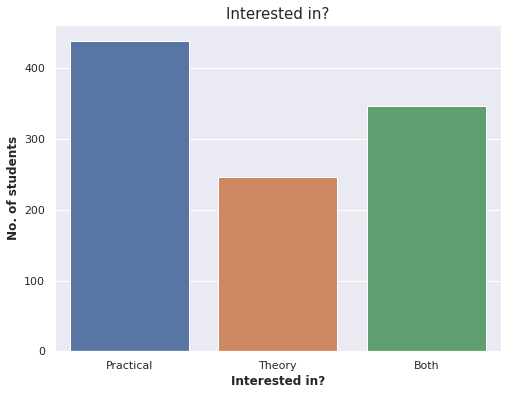

In [67]:
# using the countplot we see 
plt.figure(figsize=(8,6))
sns.countplot(x=df['Interested in?'])
plt.title('Interested in?', size = 15)
plt.xlabel('Interested in?',weight='bold')
plt.ylabel('No. of students',weight='bold')
plt.show()

#### Insight: 
* during online learning students interested to do practical over a theory but also many students interested in both practical as well as theory..

### 10.Time spend on study

In [68]:
df['Study time (Hours)'].value_counts()

4     213
3     181
5     150
2     144
6     109
1      73
8      68
7      58
10     25
9      12
Name: Study time (Hours), dtype: int64

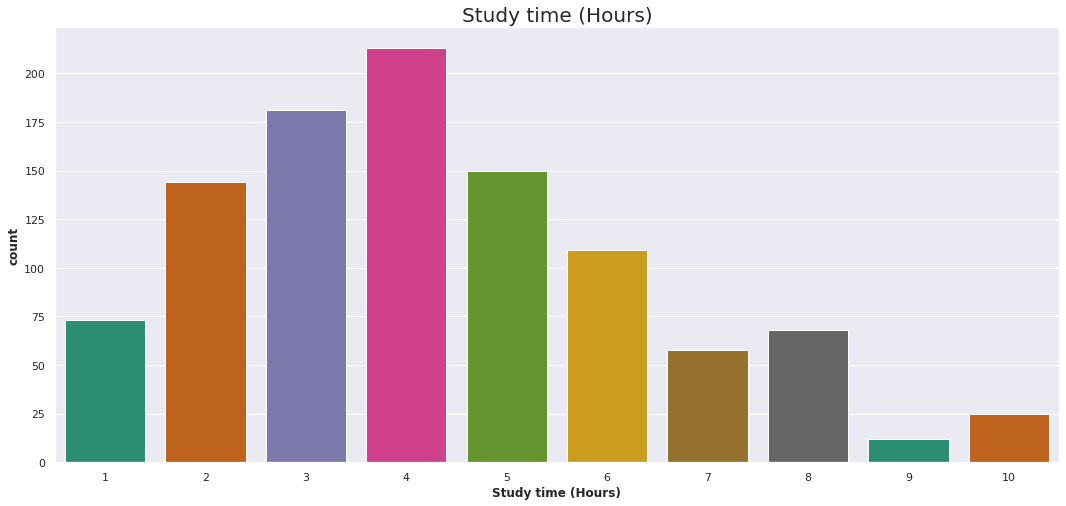

In [69]:
# plotting the count plot
plt.figure(figsize=(18, 8))
sns.set(style='darkgrid')    
plot = sns.countplot(x='Study time (Hours)', data=df, palette= 'Dark2')  # palette are to control colors or patterns of a columns
plt.title('Study time (Hours)', size= 20)
plt.xlabel('Study time (Hours)', weight='bold')
plt.ylabel('count', weight='bold')
plt.show()

#### Insight:
* Average time spent on studies is 3-4 hours.
* only from dataset 25 student spend maximum time on study

### Conclusion:

* Based on survey we see that because of the online eduction the majority of students not involved in any sports which impacts on human health.
* We also find out that students are not being able to give time to studies neither online classes nor self-study.



In [70]:
df.columns

Index(['Gender', 'Home Location', 'Level of Education', 'Age(Years)',
       'Number of Subjects', 'Device type used to attend classes',
       'Economic status', 'Family size', 'Internet facility in your locality',
       'Are you involved in any sports?', 'Do elderly people monitor you?',
       'Study time (Hours)', 'Sleep time (Hours)',
       'Time spent on social media (Hours)', 'Interested in Gaming?',
       'Engaged in group studies?',
       'Average marks scored before pandemic in traditional classroom',
       'Your interaction in online mode',
       'Clearing doubts with faculties in online mode', 'Interested in?',
       'Performance in online',
       'Your level of satisfaction in Online Education'],
      dtype='object')

In [71]:
df.head()

,Gender,Home Location,Level of Education,Age(Years),Number of Subjects,Device type used to attend classes,Economic status,Family size,Internet facility in your locality,Are you involved in any sports?,...,Sleep time (Hours),Time spent on social media (Hours),Interested in Gaming?,Engaged in group studies?,Average marks scored before pandemic in traditional classroom,Your interaction in online mode,Clearing doubts with faculties in online mode,Interested in?,Performance in online,Your level of satisfaction in Online Education
0,Male,Urban,Under Graduate,18,11,Laptop,Middle Class,4,5,No,...,6,1,No,No,91-100,1,1,Practical,6,Average
1,Male,Urban,Under Graduate,19,7,Laptop,Middle Class,4,1,Yes,...,5,1,Yes,No,91-100,1,1,Theory,3,Bad
2,Male,Rural,Under Graduate,18,5,Laptop,Middle Class,5,2,No,...,7,1,No,No,71-80,1,1,Both,6,Bad
3,Male,Urban,Under Graduate,18,5,Laptop,Middle Class,4,4,Yes,...,6,2,No,yes,91-100,1,2,Theory,4,Bad
4,Male,Rural,Under Graduate,18,5,Laptop,Middle Class,4,3,No,...,7,2,Yes,yes,81-90,3,3,Both,6,Average


In [72]:
categorical_columns = df.select_dtypes(include=['object'])

# Display the categorical columns
categorical_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1033 entries, 0 to 1032
Data columns (total 12 columns):
 #   Column                                                         Non-Null Count  Dtype 
---  ------                                                         --------------  ----- 
 0   Gender                                                         1033 non-null   object
 1   Home Location                                                  1033 non-null   object
 2   Level of Education                                             1033 non-null   object
 3   Device type used to attend classes                             1033 non-null   object
 4   Economic status                                                1033 non-null   object
 5   Are you involved in any sports?                                1033 non-null   object
 6   Do elderly people monitor you?                                 1033 non-null   object
 7   Interested in Gaming?                                          1033 n

In [73]:
# Assuming your DataFrame is named 'df'
column_list = categorical_columns.columns.tolist()

# Display the list of columns
print(column_list)

['Gender', 'Home Location', 'Level of Education', 'Device type used to attend classes', 'Economic status', 'Are you involved in any sports?', 'Do elderly people monitor you?', 'Interested in Gaming?', 'Engaged in group studies?', 'Average marks scored before pandemic in traditional classroom', 'Interested in?', 'Your level of satisfaction in Online Education']


In [74]:
from sklearn.preprocessing import LabelEncoder

# List of categorical columns
column_list = ['Gender', 'Home Location', 'Level of Education', 'Device type used to attend classes',
                       'Economic status', 'Are you involved in any sports?', 'Do elderly people monitor you?',
                       'Interested in Gaming?', 'Have separate room for studying?', 'Engaged in group studies?',
                       'Average marks scored before pandemic in traditional classroom', 'Interested in?',
                       'Your level of satisfaction in Online Education']

# Apply label encoding to each categorical column
label_encoder = LabelEncoder()
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])


df.head()

,Gender,Home Location,Level of Education,Age(Years),Number of Subjects,Device type used to attend classes,Economic status,Family size,Internet facility in your locality,Are you involved in any sports?,...,Sleep time (Hours),Time spent on social media (Hours),Interested in Gaming?,Engaged in group studies?,Average marks scored before pandemic in traditional classroom,Your interaction in online mode,Clearing doubts with faculties in online mode,Interested in?,Performance in online,Your level of satisfaction in Online Education
0,1,1,2,18,11,1,0,4,5,0,...,6,1,0,0,9,1,1,1,6,0
1,1,1,2,19,7,1,0,4,1,1,...,5,1,1,0,9,1,1,2,3,1
2,1,0,2,18,5,1,0,5,2,0,...,7,1,0,0,7,1,1,0,6,1
3,1,1,2,18,5,1,0,4,4,1,...,6,2,0,1,9,1,2,2,4,1
4,1,0,2,18,5,1,0,4,3,0,...,7,2,1,1,8,3,3,0,6,0


In [ ]:
plt.figure(figsize=(16, 14))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Dataset Features")
plt.show()

# *DecisionTreeClassifier*

In [76]:
X = df[selected_features]  
y = df['Your level of satisfaction in Online Education']   # Target column

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [77]:
print(type(X_train), X_train.shape )
print(type(X_test), X_test.shape )

print(type(y_train), y_train.shape )
print(type(y_test), y_test.shape )

<class 'pandas.core.frame.DataFrame'> (826, 10)
<class 'pandas.core.frame.DataFrame'> (207, 10)
<class 'pandas.core.series.Series'> (826,)
<class 'pandas.core.series.Series'> (207,)


# *KNN*

In [85]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [86]:
y_pred = knn.predict(X_test)

In [87]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print('Accuracy: {:.2f}'.format(accuracy*100))
print('Precision: {:.2f}'.format(precision*100))
print('Recall: {:.2f}'.format(recall*100))
print('F1-score: {:.2f}'.format(f1*100))

Accuracy: 57.49
Precision: 58.72
Recall: 57.49
F1-score: 53.97


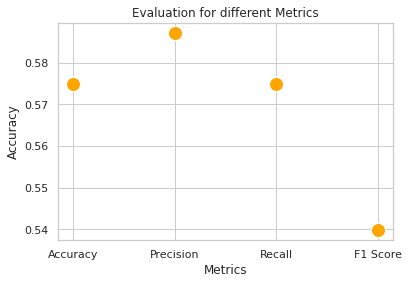

In [88]:
sns.set_style('whitegrid')
sns.scatterplot(x=['Accuracy', 'Precision', 'Recall', 'F1 Score'], y=[accuracy, precision, recall, f1], s=200, color='orange')
plt.xlabel('Metrics')
plt.ylabel('Accuracy')
plt.title('Evaluation for different Metrics')
plt.show()

# *Conclusion*

* The reason for accuracy results is because of small dataset